<a href="https://colab.research.google.com/github/canaytsr/GlobalAIHubMLCourse/blob/main/Final%20Project/Final_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project**
In this project, our aim is to building a model for predicting wine qualities. Our label will be quality column. **Do not forget, this is a Classification problem!**

# **Steps**

* Read the winequality.csv file and describe it.
* Make at least 4 different analysis on Exploratory Data Analysis section.
* Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
* Define appropriate evaluation metric for our case (classification).
Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
* Check if is there any overfitting and underfitting. Interpret your results and try to overcome if there is any problem in a new section.
* Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
* Analyse and compare results of 3 algorithms.
Select best performing model based on evaluation metric you chose on test dataset.



In [45]:
# Read the winequality.csv file and describe it.
import pandas as pd
import numpy as np


df = pd.read_csv('https://raw.githubusercontent.com/canaytsr/GlobalAIHubMLCourse/main/Final%20Project/winequality.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [47]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [48]:
df.shape
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [49]:

df.groupby(by="quality").count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


#**Exploratory Data Analysis** 

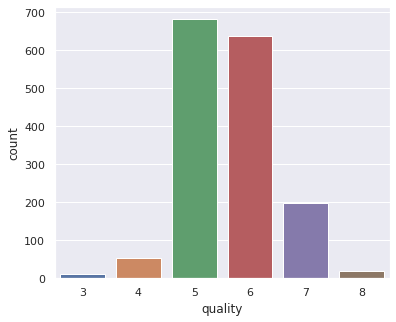

In [56]:
# Our label distribution (countplot)
from plotly.offline import iplot
import plotly.graph_objs as go
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

plt.figure(figsize=(6, 5))
sns.countplot(x ='quality', data = df)
plt.show()

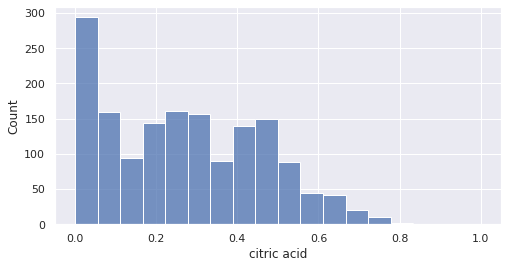

In [57]:
# Example EDA (histplot)
sns.histplot(df['citric acid'])             
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



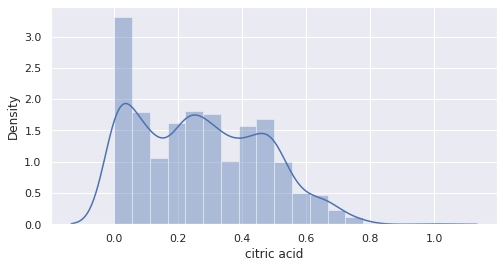

In [61]:
# Example EDA (distplot)
sns.distplot(df['citric acid'])             
plt.show()


In [ ]:
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

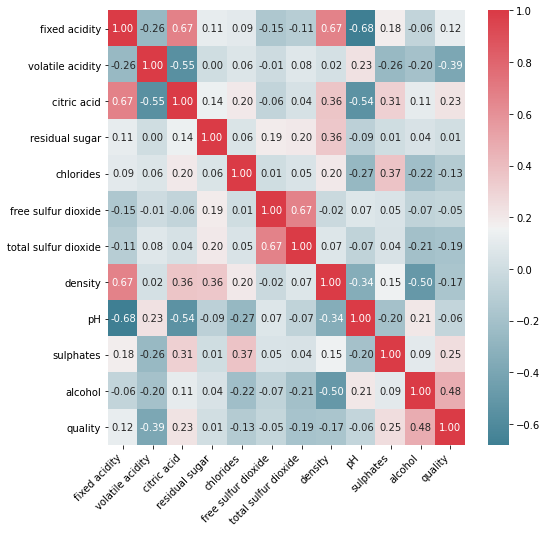

In [ ]:
# Correlation of the features
correlations = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".2f")
ax.set_xticklabels(
    column_names,
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(column_names);
plt.show()


# **Preprocessing**

In [ ]:
df.isna().sum()
df.dropna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
#Are there any duplicated values?
df.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
bins = (2, 6, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()
# Bad becomes 0 and good becomes 1
df['quality'] = label_quality.fit_transform(df['quality'])
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']

In [ ]:
#Splitting dataset
#Train and Test splitting of data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, test_size=0.3, random_state=40)
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1035,10.1,0.37,0.34,2.4,0.085,5.0,17.0,0.99683,3.17,0.65,10.6
49,5.6,0.31,0.37,1.4,0.074,12.0,96.0,0.99540,3.32,0.58,9.2
799,9.4,0.50,0.34,3.6,0.082,5.0,14.0,0.99870,3.29,0.52,10.7
538,12.9,0.35,0.49,5.8,0.066,5.0,35.0,1.00140,3.20,0.66,12.0
660,7.2,0.52,0.07,1.4,0.074,5.0,20.0,0.99730,3.32,0.81,9.6
...,...,...,...,...,...,...,...,...,...,...,...
26,7.6,0.41,0.24,1.8,0.080,4.0,11.0,0.99620,3.28,0.59,9.5
1152,8.3,0.60,0.25,2.2,0.118,9.0,38.0,0.99616,3.15,0.53,9.8
868,6.8,0.56,0.22,1.8,0.074,15.0,24.0,0.99438,3.40,0.82,11.2
686,7.1,0.65,0.18,1.8,0.070,13.0,40.0,0.99700,3.44,0.60,9.1


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# **ML Application**

SupportVectorClassifier: 0.879344 (0.026923)
StochasticGradientDecentC: 0.850780 (0.036095)
RandomForestClassifier: 0.899871 (0.017175)
DecisionTreeClassifier: 0.862331 (0.034873)
GaussianNB: 0.824831 (0.029201)
KNeighborsClassifier: 0.866819 (0.025556)
AdaBoostClassifier: 0.869530 (0.035068)
LogisticRegression: 0.882054 (0.034715)


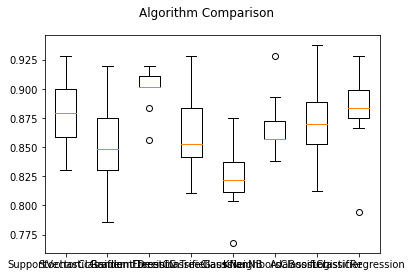

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection

# prepare models
models = []
models.append(('SupportVectorClassifier', SVC()))
models.append(('StochasticGradientDecentC', SGDClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('LogisticRegression', LogisticRegression()))

# evaluate each model in turn
results = []
names = []
seed=10
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Accuracy of train: 0.9195710455764075
Accuracy of test: 0.89375
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       411
           1       0.69      0.48      0.56        69

    accuracy                           0.89       480
   macro avg       0.80      0.72      0.75       480
weighted avg       0.88      0.89      0.89       480

Bias for training =  0.08042895442359255
Bias for test =  0.10624999999999996
Variance =  0.02582104557640741 

Precision = 0.8020833333333333
Recall = 0.720882259600127
Accuracy = 0.89375
F1 Score = 0.7518021717309975


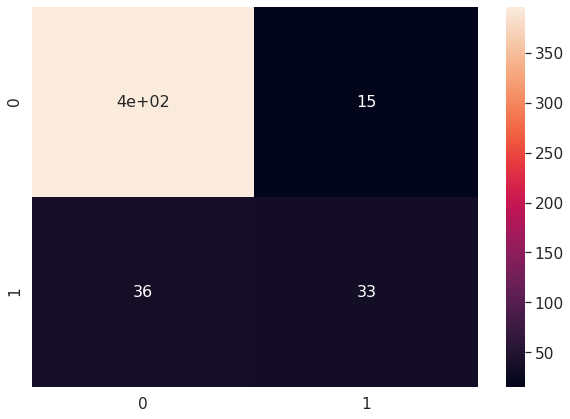

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score

clf = DecisionTreeClassifier(max_depth=4 , random_state=42)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))
print(classification_report(y_test,pred))
BiasTr = 1-(clf.score(X_train,y_train))
BiasTs = 1-(clf.score(X_test,y_test))
print("Bias for training = ",BiasTr)
print("Bias for test = ",BiasTs)
print("Variance = ", BiasTs-BiasTr,"\n")
#Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()
#Underfitting problem (High bias and low variance)

Accuracy of train: 0.9392314566577301
Accuracy of test: 0.8645833333333334

Bias for training: 0.06076854334226989
Bias for test: 0.13541666666666663
Precision = 0.8020833333333333
Recall = 0.720882259600127
Accuracy = 0.89375
F1 Score = 0.7518021717309975


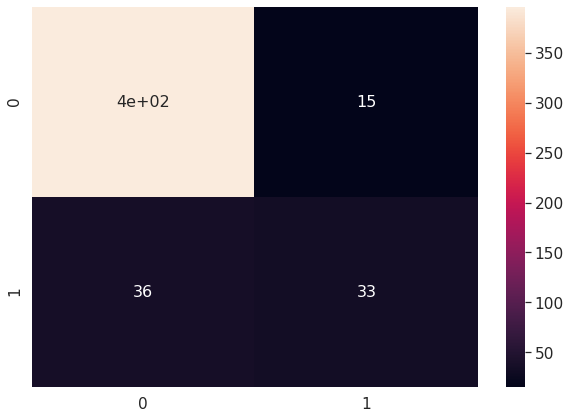

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))
print("\nBias for training:",1-clf.score(X_train,y_train))
print("Bias for test:",1-clf.score(X_test,y_test))

#Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

Accuracy of train: 0.8972296693476318
Accuracy of test: 0.8770833333333333 

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       411
           1       0.69      0.48      0.56        69

    accuracy                           0.89       480
   macro avg       0.80      0.72      0.75       480
weighted avg       0.88      0.89      0.89       480

Accuracy = 0.89375
Precision = 0.8020833333333333
Recall = 0.720882259600127
F1 Score = 0.7518021717309975


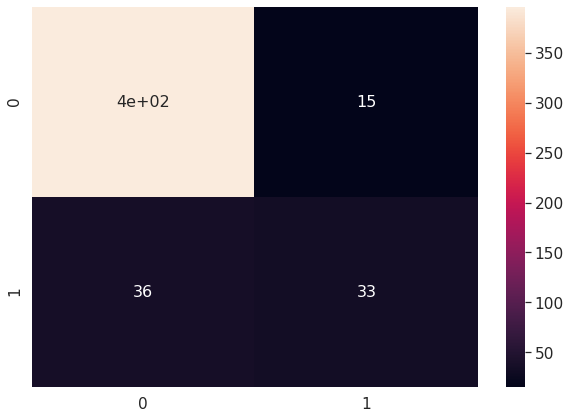

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

print("Accuracy of train:",svc.score(X_train,y_train))
print("Accuracy of test:",svc.score(X_test,y_test),"\n")
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))
# Metrics
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))
# Confusion Matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

In [ ]:
def svc_param_selection(X, y, nfolds):
    param = {
        'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
        'kernel': ['linear', 'rbf'],
        'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
    }
    grid_search = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=nfolds)
    grid_search.fit(X,  y)
    return grid_search.best_params_

In [ ]:
from sklearn.model_selection import GridSearchCV
svc_param_selection(X_train, y_train,10)

{'C': 1.1, 'gamma': 1.1, 'kernel': 'rbf'}

In [ ]:
svc2 = SVC(C = 1.3, gamma =  1.3, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print('Confusion matrix')
print(confusion_matrix(y_test, pred_svc2))
print('Classification report')
print(classification_report(y_test, pred_svc2))
print('Accuracy score',accuracy_score(y_test, pred_svc2))

Confusion matrix
[[408   3]
 [ 52  17]]
Classification report
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       411
           1       0.85      0.25      0.38        69

    accuracy                           0.89       480
   macro avg       0.87      0.62      0.66       480
weighted avg       0.88      0.89      0.86       480

Accuracy score 0.8854166666666666


In [ ]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=20,
                             random_state=0)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", rfc.score(X_train, y_train))
print("Testing accuracy :", rfc.score(X_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.9125


In [ ]:
# classification report
print(classification_report(y_test, pred_rfc))

# confusion matrix
confusion_matrix(y_test, pred_rfc)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       411
           1       0.85      0.48      0.61        69

    accuracy                           0.91       480
   macro avg       0.88      0.73      0.78       480
weighted avg       0.91      0.91      0.90       480



array([[405,   6],
       [ 36,  33]])

Accuracy = 0.89375
Precision = 0.8020833333333333
Recall = 0.720882259600127
F1 Score = 0.7518021717309975


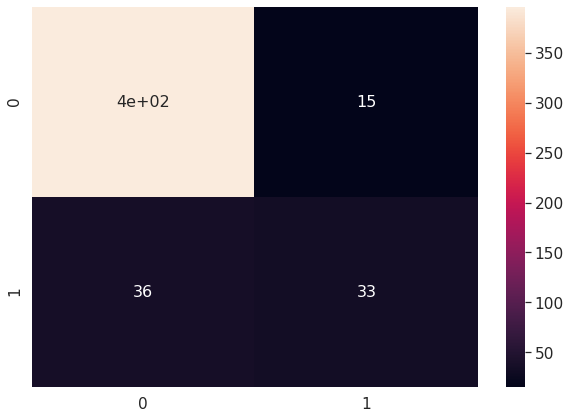

In [ ]:
# Metrics
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

# Confusion Matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

In [ ]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=60)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)
pred_sgd

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
ada_classifier = AdaBoostClassifier(n_estimators=100)
ada_classifier.fit(X_train, y_train)
pred_ada = ada_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(mean_absolute_error(test_labels,predictions)))
    print('Accuracy = {:0.2f}%.'.format(accuracy_score(test_labels,predictions)*100))

In [ ]:
evaluate(svc,X_test,y_test)
evaluate(svc2,X_test,y_test)
evaluate(sgd,X_test,y_test)
evaluate(rfc,X_test,y_test)
evaluate(ada_classifier,X_test,y_test)

Model Performance
Average Error: 0.1229 degrees.
Accuracy = 87.71%.
Model Performance
Average Error: 0.1146 degrees.
Accuracy = 88.54%.
Model Performance
Average Error: 0.1521 degrees.
Accuracy = 84.79%.
Model Performance
Average Error: 0.0875 degrees.
Accuracy = 91.25%.
Model Performance
Average Error: 0.1021 degrees.
Accuracy = 89.79%.


In [ ]:
from sklearn.linear_model import LogisticRegression

# creating the model
model = LogisticRegression()

# feeding the training set into the model
model.fit(X_train, y_train)

# predicting the results for the test set
y_pred = model.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.8838248436103664
Testing accuracy : 0.8833333333333333
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       411
           1       0.72      0.30      0.43        69

    accuracy                           0.88       480
   macro avg       0.81      0.64      0.68       480
weighted avg       0.87      0.88      0.86       480

[[403   8]
 [ 48  21]]


Box plots of (SVC ,RFC )algorithm’s close together that corresponds to the high density of accuracy scores.
Best performing model RFC.